In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
coin = cv2.imread("/Users/tobiasschulz/Documents/GitHub/ai-fall-exercises/M6/06. Contours and Blob detection/img/cropped2/1.png")
coin.shape

(158, 158, 3)

In [4]:
coin2 = cv2.imread("/Users/tobiasschulz/Documents/GitHub/ai-fall-exercises/M6/06. Contours and Blob detection/img/coins/train/1c/train_1_19.jpg")
coin2.shape

(150, 150, 3)

# Mini projects

You can do the projects in any order, just choose the ones that you like the most

### Identify shapes

1. Make a function that given an image with different types of regular shapes (triangles, squares, rectangles, circles, penthagons, exagons etc) it can detect and __draw a blue contour around the triangles__ 
2. Extend the function so it draws a green contour around the penthagons
3. Now we also need to detect rectangles, make sure squares are not being confused by rectangles
4. Make sure only the external contours are drawn on the shapes
5. Add the name of the shape on top of each image
6. Only draw the contour around the biggest shape of each type

### Book cover extractor

1. From a given picture detect the book on the image and draw a box around it
1. Crop the book from the picture
1. If there is more than a book in the image make sure all books are extracted
1. Transform the book perspective to show it as a 2D image (to see the proper book cover)

### Coins  counter

1. Create a function that can detect coins and draw  controur around them
2. Count how may coins there are in the image and put it in text on top of the image
3. Crop each coin and save the images on disk, display them on screen, the cropped coin should not have the contour on it
4. Train a image classifier to detect which coins are on the image
5. Put it all together and from the picture of some coins give the total amount of money 
 

In [3]:
coins = cv2.imread("./img/coins.jpg")
coins_color = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

In [4]:
def detect_coins():
    coins = cv2.imread("./img/coins.jpg")
    coins_color = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
    coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
    coins_blur = cv2.medianBlur(coins_gray, 7)

    # detect coins with Hough Transformation 
    circles = cv2.HoughCircles(
        coins_blur, 
        cv2.HOUGH_GRADIENT,  
        1,
        140,
        param1=140,
        param2=40,
        minRadius=10,  
        maxRadius=150)

    coins_color_copy = coins_color.copy()

    idx = 0
    for detected_circle in circles[0]:
        idx += 1
        x, y, radius = detected_circle
        x = (int(round(x)))
        y = (int(round(y)))
        radius = int(round(radius))
        
        # draw circles around the coins
        coins_detected = cv2.circle(
            coins_color_copy,
            (x, y),
            radius,
            (0, 255, 0),
            4)
        y_start = y - radius
        y_end = y + radius
        x_start = x - radius
        x_end = x + radius
        single_coin = coins_color[y_start-5:y_end+5,x_start-5:x_end+5]
        #cropping images
        cv2.imwrite("/Users/tobiasschulz/Documents/GitHub/ai-fall-exercises/M6/06. Contours and Blob detection/img/cropped2/"+str(idx) + '.png', single_coin)
    count = len(circles[0])
    cv2.putText(coins_detected, f"{count} coins", (10, 350), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    cv2.putText(coins_detected, "detected", (10, 380), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    cv2.imwrite("./img/export/detected_coins.jpg", coins_detected)

    #plt.figure(figsize=(20,7))
    #plt.imshow(coins_detected)

    return circles


In [14]:
detect_coins()

array([[[586.5,  92.5,  74.1],
        [448.5, 275.5,  86.2],
        [423.5,  90.5,  75.5],
        [752.5,  92.5,  81.1],
        [244.5, 275.5,  90.9],
        [263.5,  92.5,  70.2],
        [654.5, 277.5,  94. ],
        [121.5,  93.5,  59.8]]], dtype=float32)

## Train model

# BACKUP

In [289]:
euro = {
        "1 Cent": {
            "value": 1,
            "radius": 8.125,
            "ratio": 1,
            "count": 0,
        },
        "2 Cent": {
            "value": 2,
            "radius": 9.375,
            "ratio": 1.153846153846154,
            "count": 0,
        },
        "5 Cent": {
            "value": 5,
            "radius": 10.625,
            "ratio": 1.307692307692308,
            "count": 0,
        },
        "10 Cent": {
            "value": 10,
            "radius": 9.875,
            "ratio": 1.215384615384615,
            "count": 0,
        },
        "20 Cent": {
            "value": 20,
            "radius": 1.369230769230769,
            "ratio": 1.3,
            "count": 0,
        },
        "50 Cent": {
            "value": 50,
            "radius": 12.125,
            "ratio": 1.492307692307692,
            "count": 0,
        },
        "1 Euro": {
            "value": 100,
            "radius": 11.625,
            "ratio": 1.430769230769231,
            "count": 0,
        },
        "2 Euro": {
            "value": 200,
            "radius": 12.875,
            "ratio": 1.584615384615385,
            "count": 0,
        },
    }

circles = detect_coins()
radius = []
coordinates[]

for circle in circles:
    x, y, radius = 

In [9]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 5:
        M = cv2.moments(contours)
    return (int(M['m10']/M['m00']))

In [11]:
def crop_coins(path):
    coins = cv2.imread(path)
    coins_color = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
    coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
    gaussian_blur_coins = cv2.GaussianBlur(coins_gray, (11,11), 0)
    ret, th = cv2.threshold(gaussian_blur_coins, 200, 255, cv2.THRESH_BINARY_INV)
    coin_contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    coins_color_copy = coins_color.copy()

    cv2.drawContours(coins_color_copy, coin_contours, -1, (255,0,0), 2)

    count = len(coin_contours)
    text = f"There are {count} coins in the picture"
    cv2.putText(coins_color_copy, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 1)

    sorted_contours = sorted(coin_contours, key=get_contour_x_center_coordinate)
    idx = 0
    for contour in sorted_contours:
        x,y,w,h = cv2.boundingRect(contour) 
        if w>5 and h>5:
            idx+=1
            new_img=coins_color[y:y+h,x:x+w]
            #cropping imagesabs
            cv2.imwrite("/Users/tobiasschulz/Documents/GitHub/ai-fall-exercises/M6/06. Contours and Blob detection/img/cropped2/"+str(idx) + '.png', new_img)
  
    plt.figure(figsize=(20,7))
    plt.imshow(coins_color_copy)

    return coin_contours

In [12]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [13]:
coin_contours = crop_coins("./img/coins.jpg")

UnboundLocalError: local variable 'M' referenced before assignment

In [170]:
all_areas = get_contour_areas(coin_contours)
print(sorted(all_areas))

[0.0, 0.0, 0.0, 2.0, 6.0, 6.5, 12.0, 69.0, 163.5, 201.5, 674.0, 9856.5, 9989.0, 11479.0, 15104.0, 16936.0, 19090.5, 23421.0, 25425.0]


In [157]:
vg = sorted(all_areas)[1] / sorted(all_areas)[0]
vg

1.7713538640325392

In [84]:
sorted_contours = sorted(coin_contours, key=get_contour_x_center_coordinate)
idx = 0
for contour in sorted_contours:
    x,y,w,h = cv2.boundingRect(contour) 
    if w>5 and h>5:
        idx+=1
        new_img=coins_color[y-2:y+h+2,x-2:x+w+2]
        #cropping imagesabs
        cv2.imwrite("./img/cropped/"+str(idx) + '.png', new_img)

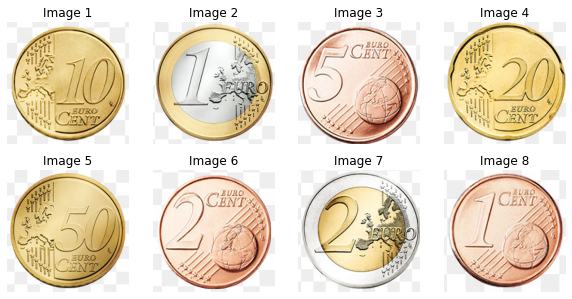

In [318]:
coins = ["1.png", "2.png", "3.png", "4.png", "5.png", "6.png", "7.png", "8.png"]

fig = plt.figure(figsize=(10, 5)) 
rows = 2
columns = 4

for i, e in enumerate(coins):
    # Adds a subplot at the 1st position 
    image = cv2.imread(f"./img/cropped2/{e}")
    fig.add_subplot(rows, columns, i+1) 
    plt.imshow(image)
    plt.axis('off') 
    plt.title(f"Image {i+1}") 
    
plt.show();

## Handwriting recognition Improved

We have already introduced this project in a previous day, if you have already work on it you will just need to go back to your existing code and improve it, if not then you will have to start from scratch

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits

### Improved version
1. Write a secuence of 4 numbers or more in a paper, for instance it could be a year, a phone number, or anything else make a photo of it
1. Apply everything you now so far and given a original photo of the number you wrote on paper as the input of a function and return the number as a string. 
1. The function will have to process the image, detect and extract the numbers one by one and then recognize them to be able to get the labels, concatenate them (in the right order!) and return them as a single string.

This might not be a simple project, you will need to experiment a lot and try different things, so do not feel discouraged and enjoy the challenge!